Equipe:

Ana Beatriz Romero - RA: 850038

Vinícius Mergulhão Teti - RA: 850066

Pablo Felipe dos Santos - RA:849603

João Victor Rocha Fernandes - RA: 850069

Thiago Gabriel Tahim Gonçalves de Lima - RA: 849561


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
#Adicionamos nossos dados a uma pagina do github e a importamos para desenvolvimento do codigo
df = pd.read_excel("https://raw.githubusercontent.com/Anabia-05/DadosEstatistica/main/Base_dados_sobral%20.xlsx")

In [ ]:
df.head()

,NO_UF,NO_MUNICIPIO,TP_DEPENDENCIA,TP_LOCALIZACAO,TP_SITUACAO_FUNCIONAMENTO,IN_ENERGIA_REDE_PUBLICA,IN_ESGOTO_REDE_PUBLICA,IN_LIXO_SERVICO_COLETA,IN_BANHEIRO,IN_BIBLIOTECA,IN_COZINHA,IN_LABORATORIO_CIENCIAS,IN_LABORATORIO_INFORMATICA,IN_REFEITORIO,IN_COMPUTADOR,TP_REDE_LOCAL,QT_MAT_BAS
0,Ceará,Sobral,3,1,1,1,1,1,1,1,1,0,0,0,1,1,428
1,Ceará,Sobral,4,1,1,1,1,1,1,1,0,0,0,0,1,1,159
2,Ceará,Sobral,2,1,1,1,1,1,1,1,1,1,1,0,1,1,644
3,Ceará,Sobral,2,1,1,1,1,1,1,1,1,1,1,0,1,3,356
4,Ceará,Sobral,4,1,1,1,1,1,1,1,0,1,1,0,1,1,727


<ipython-input-4-6470d51dcff4>:11: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['TP_REDE_LOCAL'] = df['TP_REDE_LOCAL'].replace({



Total de escolas: 130

Total de escolas com cada serviço:
IN_COMPUTADOR                 114
IN_BIBLIOTECA                  85
IN_LABORATORIO_INFORMATICA     65
IN_ENERGIA_REDE_PUBLICA       130
IN_LABORATORIO_CIENCIAS        45
TP_REDE_LOCAL                 108
IN_ESGOTO_REDE_PUBLICA        109
IN_REFEITORIO                  75
dtype: int64

Porcentagem de escolas com cada serviço:
IN_COMPUTADOR                  87.692308
IN_BIBLIOTECA                  65.384615
IN_LABORATORIO_INFORMATICA     50.000000
IN_ENERGIA_REDE_PUBLICA       100.000000
IN_LABORATORIO_CIENCIAS        34.615385
TP_REDE_LOCAL                  83.076923
IN_ESGOTO_REDE_PUBLICA         83.846154
IN_REFEITORIO                  57.692308
dtype: float64


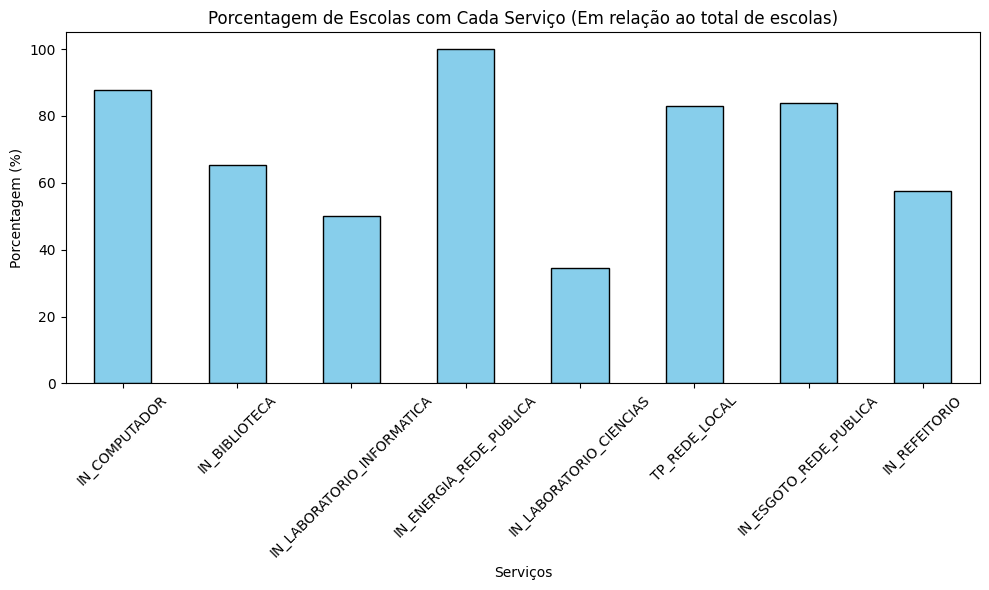

In [ ]:
# Substituir valores da coluna TP_REDE_LOCAL conforme dicionário
df['TP_REDE_LOCAL'] = df['TP_REDE_LOCAL'].replace({
    0: 'Não Tem rede local',
    1: 'A Cabo',
    2: 'Wireless',
    3: 'A cabo e wireless',
    9: 'Não informado'
})

# Convertendo os valores categóricos da rede local em binário
df['TP_REDE_LOCAL'] = df['TP_REDE_LOCAL'].replace({
    'A Cabo': 1,
    'Wireless': 1,
    'A cabo e wireless': 1,
    'Não Tem rede local': 0,
    'Não informado': 0
})

# Definindo as colunas para análise de serviços
servicos_columns = [
    'IN_COMPUTADOR', 'IN_BIBLIOTECA', 'IN_LABORATORIO_INFORMATICA',
    'IN_ENERGIA_REDE_PUBLICA', 'IN_LABORATORIO_CIENCIAS',
    'TP_REDE_LOCAL', 'IN_ESGOTO_REDE_PUBLICA', 'IN_REFEITORIO'
]

# Convertendo as colunas de serviços para valores binários e tratando valores ausentes
df[servicos_columns] = df[servicos_columns].apply(pd.to_numeric, errors='coerce').fillna(0).astype(int)

# Somando o total de escolas que possuem cada serviço (valor '1' em cada coluna)
total_escolas_com_servico = df[servicos_columns].sum()

# Calculando a porcentagem de escolas com cada serviço
total_escolas = len(df)
porcentagem_servicos = (total_escolas_com_servico / total_escolas) * 100

# Exibindo os resultados
print(f"\nTotal de escolas: {total_escolas}")
print(f"\nTotal de escolas com cada serviço:\n{total_escolas_com_servico}")
print(f"\nPorcentagem de escolas com cada serviço:\n{porcentagem_servicos}")

# Criando o gráfico de barras
fig, ax = plt.subplots(figsize=(10, 6))
porcentagem_servicos.plot(kind='bar', ax=ax, color='skyblue', edgecolor='black')
plt.title('Porcentagem de Escolas com Cada Serviço (Em relação ao total de escolas)')
plt.ylabel('Porcentagem (%)')
plt.xlabel('Serviços')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Observa-se que a maioria das escolas possui energia da rede pública (100%) e computadores (acima de 80%). Outros serviços, como rede local e esgoto da rede pública, também apresentam altos índices de disponibilidade. Em contrapartida, laboratórios de ciências e refeitórios são menos frequentes, indicando áreas onde a infraestrutura escolar poderia ser aprimorada para maior cobertura.


Pontuação de infraestrutura e indicador qualitativo das primeiras escolas:
   PONTUACAO_INFRAESTRUTURA INDICADOR_QUALITATIVO
0                         5                   Boa
1                         5                   Boa
2                         7             Excelente
3                         7             Excelente
4                         7             Excelente

Distribuição das Escolas por Categoria Qualitativa:
INDICADOR_QUALITATIVO
Excelente    63
Boa          59
Regular       8
Name: count, dtype: int64


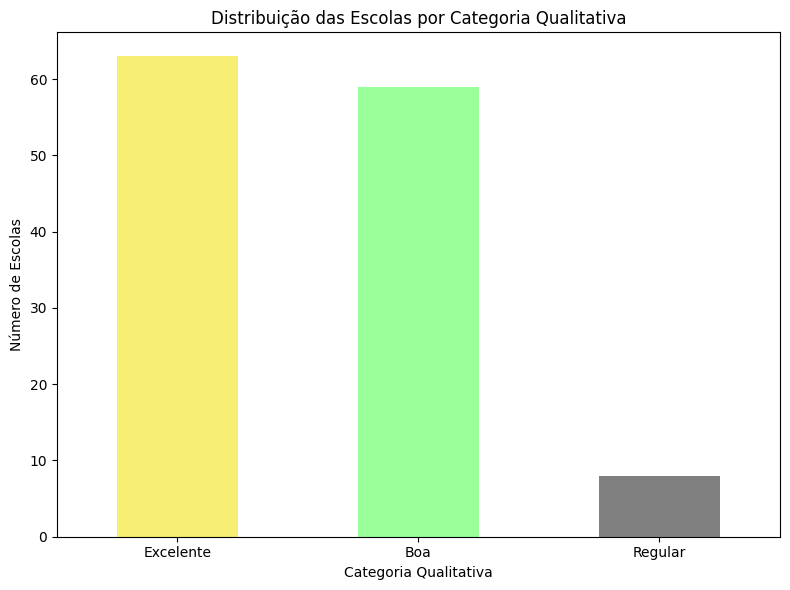

In [ ]:
# A pontuação é a soma dos serviços que cada escola possui
df['PONTUACAO_INFRAESTRUTURA'] = df[servicos_columns].sum(axis=1)


# indicador qualitativo de pontuação
def qualificar_escola(pontuacao):
    if pontuacao >= 6:
        return 'Excelente'
    elif pontuacao >= 4:
        return 'Boa'
    elif pontuacao >= 2:
        return 'Regular'
    else:
        return 'Ruim'

df['INDICADOR_QUALITATIVO'] = df['PONTUACAO_INFRAESTRUTURA'].apply(qualificar_escola)

# Exibir as primeiras linhas para verificar a pontuação e o indicador qualitativo
print("\nPontuação de infraestrutura e indicador qualitativo das primeiras escolas:")
print(df[['PONTUACAO_INFRAESTRUTURA', 'INDICADOR_QUALITATIVO']].head())

# Analisar a distribuição das escolas nas diferentes categorias
qualitativo_contagem = df['INDICADOR_QUALITATIVO'].value_counts()
print("\nDistribuição das Escolas por Categoria Qualitativa:")
print(qualitativo_contagem)

# Criar um gráfico de barras para a distribuição qualitativa
fig, ax = plt.subplots(figsize=(8, 6))
qualitativo_contagem.plot(kind='bar', ax=ax, color=['#f6ef74','#99ff99','#808080','#ffcc99'])
plt.title('Distribuição das Escolas por Categoria Qualitativa')
plt.ylabel('Número de Escolas')
plt.xlabel('Categoria Qualitativa')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


Baseado nos resultados, vemos que a quantidade de escolas nas categorias "Excelente" e "Boa" sao bem próximas, porém, ainda há uma predominância das instituicões excelentes. Em contra partida, poucas escolas estão na categoria "Regular" e nenhuma se encaixa na "Ruim".


In [ ]:
# Calcular medidas centrais e de dispersão para a pontuação de infraestrutura
media_pontuacao = df['PONTUACAO_INFRAESTRUTURA'].mean()
mediana_pontuacao = df['PONTUACAO_INFRAESTRUTURA'].median()
desvio_padrao_pontuacao = df['PONTUACAO_INFRAESTRUTURA'].std()
cv_pontuacao = (desvio_padrao_pontuacao / media_pontuacao) * 100

print("\nAnálise Descritiva da Pontuação de Infraestrutura das Escolas:")
print(f"Média: {media_pontuacao:.4f}")
print(f"Mediana: {mediana_pontuacao:.4f}")
print(f"Desvio Padrão: {desvio_padrao_pontuacao:.4f}")
print(f"Coeficiente de Variação (CV): {cv_pontuacao:.4f}%")



Análise Descritiva da Pontuação de Infraestrutura das Escolas:
Média: 5.6231
Mediana: 5.0000
Desvio Padrão: 1.4102
Coeficiente de Variação (CV): 25.0785%


- **Média e Mediana:**  A proximidade entre média e mediana sugere uma distribuição relativamente equilibrada, sem grandes desvios para valores muito altos ou baixos.

- **Desvio padrao:** Esse valor nos diz que há uma variação moderada nos dados: os valores não estão extremamente próximos da média, mas também não estão altamente dispersos.

- **Coeficiente de variacao:** Como o CV expressa a dispersão relativa em relação à média, valores altos indicam maior inconsistência na distribuição de um serviço, sugerindo que algumas escolas têm mais acesso a ele enquanto outras têm menos.